# Tablero de pruebas
La idea de este archivo es ir probando los snippets, pero manteniendo código en memoria para no hacer (por ejemplo) la llamada a la API

# EXTRAE.PY

In [1]:

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from descarga import rescata_dataset
from descarga_usuarios import rescata_usuarios
import nest_asyncio
nest_asyncio.apply()


def extrae_dataset():
    df = rescata_dataset()
    
    return df

def extrae_usuarios():
    
    df_usuarios = rescata_usuarios()
    return df_usuarios


# Ejecutar solo si dataset no existe o está vacío
try:
    if dataset.empty:
        print("Dataset está vacío. Recalculando...")
        dataset = extrae_dataset()
        #usuarios = extrae_usuarios()
except NameError:
    print("Dataset no existe. Recalculando...")
    dataset = extrae_dataset()
    #usuarios = extrae_usuarios()

try:
    if usuarios.empty:
        print("Dataset está vacío. Recalculando...")
        #dataset = extrae_dataset()
        usuarios = extrae_usuarios()
except NameError:
    print("Dataset no existe. Recalculando...")
    #dataset = extrae_dataset()
    usuarios = extrae_usuarios()


Dataset no existe. Recalculando...
Dataset no existe. Recalculando...
Consultando API Usuarios...
Success: Result saved to consulta_resultado.txt


In [2]:
print(usuarios.columns)
print(usuarios)

Index(['usr', 'nombre', 'paterno', 'MAIL', 'cia', 'tipo_usuario'], dtype='object')
                  usr        nombre    paterno  \
0                0112        Xavier  Rodriguez   
1                0117          Jean     Pierre   
2                0118        Ismael    Vergara   
3                0204         Milko      Duran   
4                0206       Jessica       Luza   
...               ...           ...        ...   
1638  yeremy.cavieres        Yeremy   Cavieres   
1639   yesenyAsistida        yeseny  Gonazalez   
1640           ygomez      Yennifer      Gómez   
1641            ysosa       Yelipsa       Sosa   
1642       zenitoimas  Zenit masivo          -   

                                          MAIL    cia  tipo_usuario  
0            xavier.rodriguez.farfan@gmail.com    S/I         OTROS  
1                          Pierrex89@gmail.com    S/I         OTROS  
2                      isma.vergara@icloud.com    S/I         OTROS  
3                         milko05_@h

In [3]:
usuarios_grouped = usuarios.groupby('cia').size().reset_index(name='count')
print(usuarios_grouped)

                  cia  count
0                 BCI     63
1              Cardif     38
2   Compañia Nosotros      1
3        Compañía LET      1
4           Consorcio     26
5                 FID    114
6                 HDI    156
7             Liberty     18
8              Mapfre     12
9               Penta      3
10              Reale     35
11     Renta Nacional      9
12                S/I   1139
13          Siniestro      1
14               Sura      8
15              Zenit     15
16             Zurich      4


In [4]:
dataset

<coroutine object rescata_dataset at 0x000001C660B70220>

In [5]:
print(dataset.columns.T)

AttributeError: 'coroutine' object has no attribute 'columns'

In [ ]:
for i in dataset.columns:
    print(dataset[i].value_counts().head())

id_inspeccion
1200958    1
1208223    1
1208185    1
1201181    1
1201182    1
Name: count, dtype: int64
metaOI
No    275
Name: count, dtype: int64
oi_asociada_meta
0          259
1207392      2
1205042      2
1206154      2
1205990      2
Name: count, dtype: int64
cia
Sura    275
Name: count, dtype: int64
num_interno
0000014777    10
0000014831     3
0000014776     3
0000014822     3
0000014811     2
Name: count, dtype: int64
corredor
SANTANDER                         253
SANTANDER CORREDORA DE SEGUROS     22
Name: count, dtype: int64
num_corredor
0000014777    10
0000014831     3
0000014776     3
0000014822     3
0000014811     2
Name: count, dtype: int64
ramo
Vehículo Liviano    200
Vehículo Pesado      75
Name: count, dtype: int64
marca
CHEVROLET        35
VOLVO            27
FORD             19
MERCEDES BENZ    15
NISSAN           15
Name: count, dtype: int64
modelo
SILVERADO    16
T 60         10
COLORADO      7
EVOQUE        5
X TRAIL       5
Name: count, dtype: int64
patente
kf

In [ ]:
# Get the first row of the dataset
first_row = dataset.head(5)

# Output to an Excel file
first_row.to_excel('first_row_dataset.xlsx', index=False)

In [ ]:
from feriados import obtener_feriados
feriados = obtener_feriados()

         date                       title       type  inalienable  \
0  2025-01-01                   Año Nuevo      Civil         True   
1  2025-04-18               Viernes Santo  Religioso        False   
2  2025-04-19                Sábado Santo  Religioso        False   
3  2025-05-01    Día Nacional del Trabajo      Civil         True   
4  2025-05-21  Día de las Glorias Navales      Civil        False   

                   extra  
0  Civil e Irrenunciable  
1              Religioso  
2              Religioso  
3  Civil e Irrenunciable  
4                  Civil  


In [ ]:
print(feriados)

          date                                           title       type  \
0   2025-01-01                                       Año Nuevo      Civil   
1   2025-04-18                                   Viernes Santo  Religioso   
2   2025-04-19                                    Sábado Santo  Religioso   
3   2025-05-01                        Día Nacional del Trabajo      Civil   
4   2025-05-21                      Día de las Glorias Navales      Civil   
5   2025-06-20           Día Nacional de los Pueblos Indígenas      Civil   
6   2025-06-29                           San Pedro y San Pablo  Religioso   
7   2025-07-16                     Día de la Virgen del Carmen  Religioso   
8   2025-08-15                           Asunción de la Virgen  Religioso   
9   2025-09-18                          Independencia Nacional      Civil   
10  2025-09-19                 Día de las Glorias del Ejército      Civil   
11  2025-10-12                         Encuentro de Dos Mundos      Civil   

In [ ]:
# Assuming nest_asyncio has already been applied in a previous cell
from descarga import rescata_dataset

async def load_data_async(nrows):
    dataset = await rescata_dataset()
    return dataset

# ✅ Ejecutar directamente con await en Jupyter
result = await load_data_async(100)
print(result)



Consultando API... compania=9, corredora=SANTANDER
Success: Result saved to consulta_resultado.txt 2025-04-21 19:29:20.573136
Index(['id_inspeccion', 'metaOI', 'oi_asociada_meta', 'cia', 'num_interno',
       'corredor', 'num_corredor', 'ramo', 'marca', 'modelo', 'patente',
       'chasis', 'estado', 'fecha_emision', 'hora_emision', 'fecha_1_llamada',
       'hora_1_llamada', 'num_llamadas_totales', 'fecha_ult_devol',
       'motivo_ult_dev', 'comentario_ult_dev', 'num_dev_totales',
       'fecha_ult_reintento', 'hora_ult_reintento', 'comentario_ult_reintento',
       'num_total_reintento', 'fecha_1_llamada_post_ult_reintento',
       'hora_1_llamada_post_ult_reintento', 'fecha_1_agendamiento',
       'hora_1_agendamiento', '', 'fecha_ult_agendamiento',
       'hora_ult_agendamiento', 'num_agendamiento_totales',
       'fecha_cita_conreta_inspeccion', 'hora_cita_conreta_inspeccion',
       'inspector', 'realizada_app', 'fecha_inicio_inspeccion',
       'hora_inicio_inspeccion', 'fecha_

In [ ]:
print(result.columns.T)

Index(['id_inspeccion', 'metaOI', 'oi_asociada_meta', 'cia', 'num_interno',
       'corredor', 'num_corredor', 'ramo', 'marca', 'modelo', 'patente',
       'chasis', 'estado', 'fecha_emision', 'hora_emision', 'fecha_1_llamada',
       'hora_1_llamada', 'num_llamadas_totales', 'fecha_ult_devol',
       'motivo_ult_dev', 'comentario_ult_dev', 'num_dev_totales',
       'fecha_ult_reintento', 'hora_ult_reintento', 'comentario_ult_reintento',
       'num_total_reintento', 'fecha_1_llamada_post_ult_reintento',
       'hora_1_llamada_post_ult_reintento', 'fecha_1_agendamiento',
       'hora_1_agendamiento', '', 'fecha_ult_agendamiento',
       'hora_ult_agendamiento', 'num_agendamiento_totales',
       'fecha_cita_conreta_inspeccion', 'hora_cita_conreta_inspeccion',
       'inspector', 'realizada_app', 'fecha_inicio_inspeccion',
       'hora_inicio_inspeccion', 'fecha_termino_inspeccion',
       'hora_termino_inspeccion', 'fecha_transmision_inspeccion',
       'hora_transmision_inspeccion', '

In [ ]:
# kpi_formulas_aplicadas.py

import pandas as pd
import numpy as np
from math import ceil
from datetime import datetime

# =====================
# FUNCIONES AUXILIARES
# =====================

def to_datetime_safe(val):
    try:
        if val in ["NULL", "", None, np.nan]:
            return pd.NaT
        return pd.to_datetime(val, dayfirst=False, errors='coerce')
    except:
        return pd.NaT

def safe_subtract_days(date1, date2):
    if pd.isna(date1) or pd.isna(date2):
        return np.nan
    return (date1 - date2).days

def redondear_5_minutos(valor):
    if valor in [np.nan, 'error'] or pd.isna(valor):
        return np.nan
    try:
        minutos = valor * 24 * 60
        minutos_redondeados = ceil(minutos / 5) * 5
        return minutos_redondeados / (24 * 60)
    except:
        return np.nan

def bucket_15_mas(x):
    if x in ['error', np.nan]:
        return x
    try:
        if x >= 15:
            return '15+'
        return x
    except:
        return 'error'

# ============================
# APLICACIÓN DE KPI EN DATOS
# ============================
# Informe Autoinspeccion     79
#Informe Normal             77
#Informe asistida            2

def aplicar_formulas_kpi(df):
    # Conversión de columnas a datetime
    for col in ['fecha_emision', 'fecha_entrega_informe', 'fecha_inicio_inspeccion']:
        df[col] = df[col].apply(to_datetime_safe)

    # === KPI RESP BO ===
    def calcular_resp_bo(row):
        if pd.isna(row['fecha_entrega_informe']):
            return np.nan
        if row['informe_final'] == "Informe Normal":
            return safe_subtract_days(row['fecha_inicio_inspeccion'], row['fecha_emision'])
        else:
            return safe_subtract_days(row['fecha_entrega_informe'], row['fecha_emision'])

    df['kpi_resp_bo'] = df.apply(calcular_resp_bo, axis=1)
    df['kpi_resp_bo_ceiling'] = df['kpi_resp_bo'].apply(lambda x: redondear_5_minutos(x) if isinstance(x, (int, float)) else x)
    df['kpi_resp_bo_bucket'] = df['kpi_resp_bo'].apply(bucket_15_mas)

    # === KPI DÍAS EN COORDINAR (DC y DH) ===
    def dias_en_coordinar(row, tipo):
        if row['informe_final'] != tipo:
            return np.nan
        if pd.isna(row['fecha_inicio_inspeccion']) or pd.isna(row['fecha_emision']):
            return np.nan
        return safe_subtract_days(row['fecha_inicio_inspeccion'], row['fecha_emision'])

    df['kpi_dias_en_coordinar_dc'] = df.apply(lambda r: dias_en_coordinar(r, 'Informe Normal'), axis=1)
    df['kpi_dias_en_coordinar_dh'] = df.apply(lambda r: dias_en_coordinar(r, 'Informe asistida'), axis=1)

    # === KPI DÍAS EN INSPECCIONAR (DC y DH) ===
    def dias_en_inspeccionar(row, tipo):
        if row['informe_final'] != tipo:
            return np.nan
        if pd.isna(row['fecha_entrega_informe']) or pd.isna(row['fecha_inicio_inspeccion']):
            return np.nan
        return safe_subtract_days(row['fecha_entrega_informe'], row['fecha_inicio_inspeccion'])

    df['kpi_dias_en_inspeccionar_dc'] = df.apply(lambda r: dias_en_inspeccionar(r, 'Informe Normal'), axis=1)
    df['kpi_dias_en_inspeccionar_dh'] = df.apply(lambda r: dias_en_inspeccionar(r, 'Informe asistida'), axis=1)

    # === KPI GESTIÓN TOTAL (DC y DH) ===
    def gestion_total(row, tipo):
        if row['informe_final'] != tipo:
            return np.nan
        if pd.isna(row['fecha_entrega_informe']) or pd.isna(row['fecha_emision']):
            return np.nan
        return safe_subtract_days(row['fecha_entrega_informe'], row['fecha_emision'])

    df['kpi_gestion_total_dc'] = df.apply(lambda r: gestion_total(r, 'Informe Normal'), axis=1)
    df['kpi_gestion_total_dh'] = df.apply(lambda r: gestion_total(r, 'Informe asistida'), axis=1)

    return df

# ==================
# USO DE LA FUNCIÓN
# ==================
# df = pd.read_excel("first_row_dataset.xlsx")
df = aplicar_formulas_kpi(result)
# df.to_excel("resultado_kpi.xlsx", index=False)


C:\Users\cmenajovsky\AppData\Local\Temp\ipykernel_4812\404661670.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(val, dayfirst=False, errors='coerce')


In [ ]:
dataset.columns

Index(['id_inspeccion', 'metaOI', 'oi_asociada_meta', 'cia', 'num_interno',
       'corredor', 'num_corredor', 'ramo', 'marca', 'modelo',
       ...
       'hora_correccion_definitiva', 'kpi_resp_bo', 'kpi_resp_bo_ceiling',
       'kpi_resp_bo_bucket', 'kpi_dias_en_coordinar_dc',
       'kpi_dias_en_coordinar_dh', 'kpi_dias_en_inspeccionar_dc',
       'kpi_dias_en_inspeccionar_dh', 'kpi_gestion_total_dc',
       'kpi_gestion_total_dh'],
      dtype='object', length=105)

In [ ]:
import matplotlib.pyplot as plt

# Filtrar las columnas que comienzan con "kpi"
kpi_columns = [col for col in df.columns if col.startswith('kpi')]
df[kpi_columns].head()

,kpi_resp_bo,kpi_resp_bo_ceiling,kpi_resp_bo_bucket,kpi_dias_en_coordinar_dc,kpi_dias_en_coordinar_dh,kpi_dias_en_inspeccionar_dc,kpi_dias_en_inspeccionar_dh,kpi_gestion_total_dc,kpi_gestion_total_dh
0,31.0,31.0,15+,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-172.0,-172.0,-172.0,NaN,NaN,NaN,NaN,NaN,NaN
3,-171.0,-171.0,-171.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


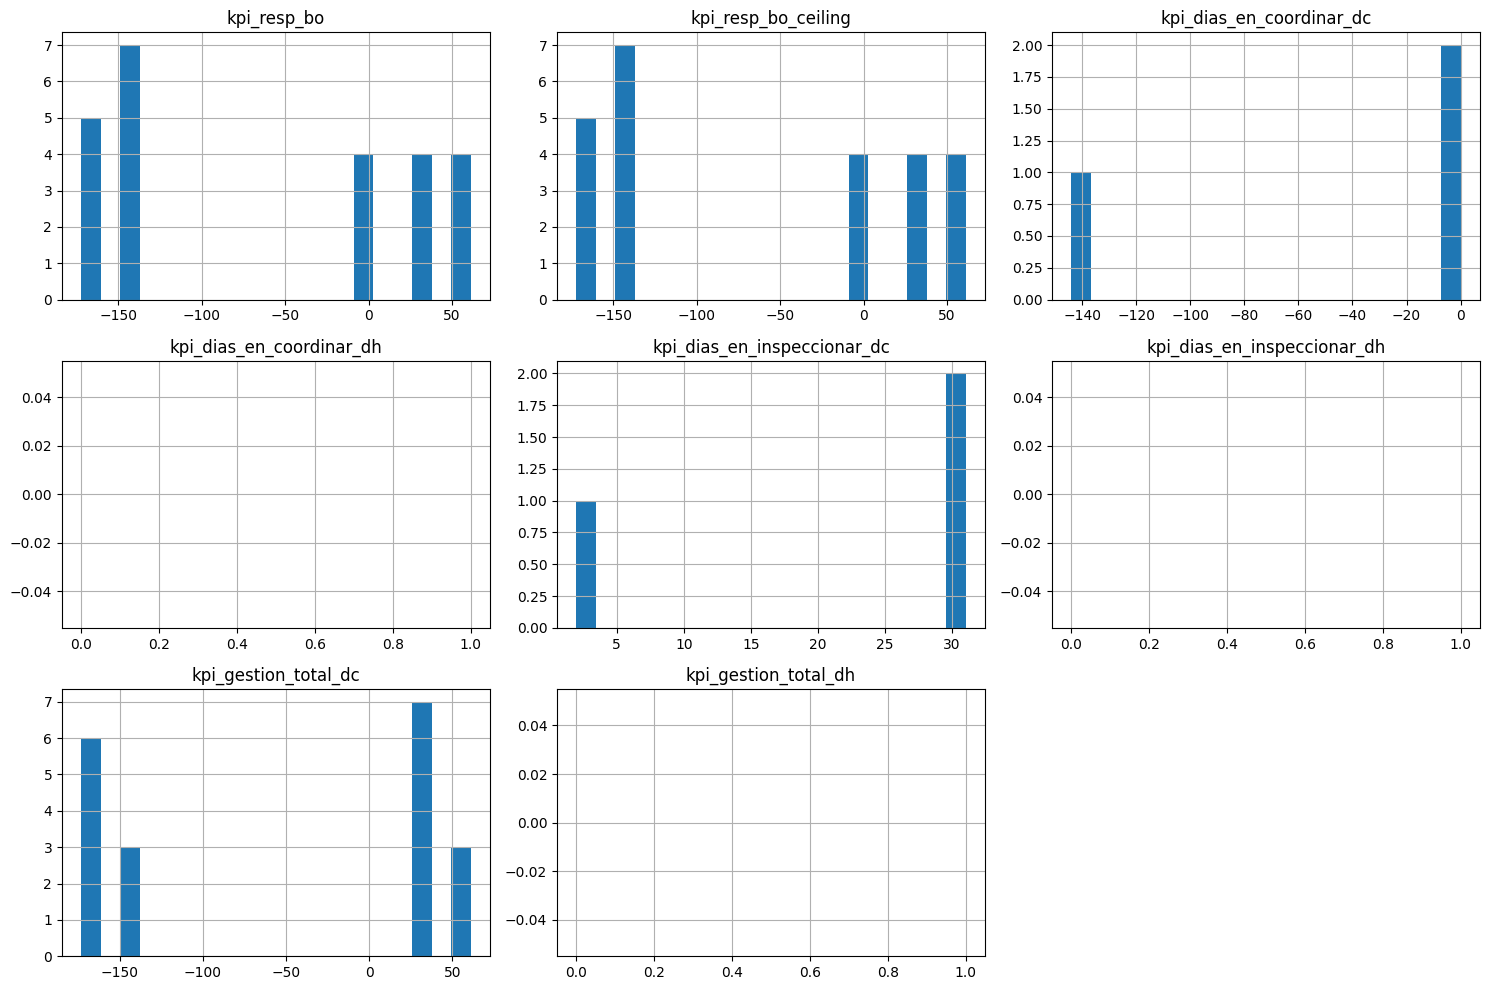

In [ ]:

# Crear histogramas para cada columna "kpi"
%matplotlib inline
df[kpi_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()